In [4]:
# Setup: imports and helper (Qiskit 1.0+)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

sim = AerSimulator()

def run_and_plot(qc, shots=1024):
    qc = transpile(qc, sim)
    result = sim.run(qc, shots=shots).result()   # no assemble needed
    counts = result.get_counts()
    try:
        display(plot_histogram(counts))
    except Exception:
        print(counts)
    return counts


🔹 Constant oracle (expect all zeros):
     ┌───┐     ┌──────────────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0                 ├┤ H ├┤M├──────
     ├───┤     │                  │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1                 ├┤ H ├─╫─┤M├───
     ├───┤     │  constant_oracle │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2                 ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│                  │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3                 ├──────╫──╫──╫─
     └───┘└───┘└──────────────────┘      ║  ║  ║ 
c: 3/════════════════════════════════════╩══╩══╩═
                                         0  1  2 


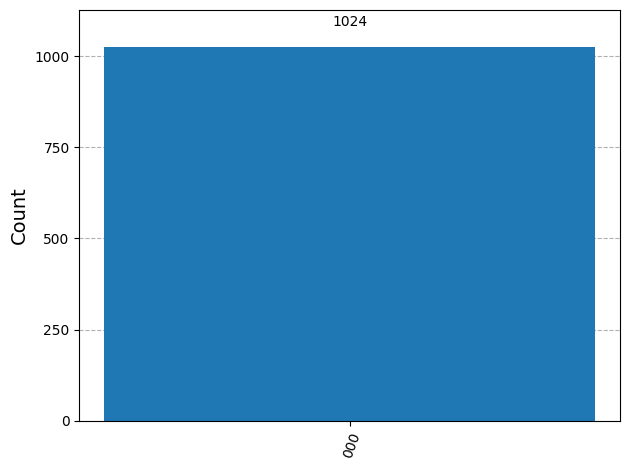

🔹 Balanced oracle (expect NOT all zeros):
     ┌───┐     ┌─────────────────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0                    ├┤ H ├┤M├──────
     ├───┤     │                     │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1                    ├┤ H ├─╫─┤M├───
     ├───┤     │  balanced_oracle_x0 │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2                    ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│                     │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3                    ├──────╫──╫──╫─
     └───┘└───┘└─────────────────────┘      ║  ║  ║ 
c: 3/═══════════════════════════════════════╩══╩══╩═
                                            0  1  2 


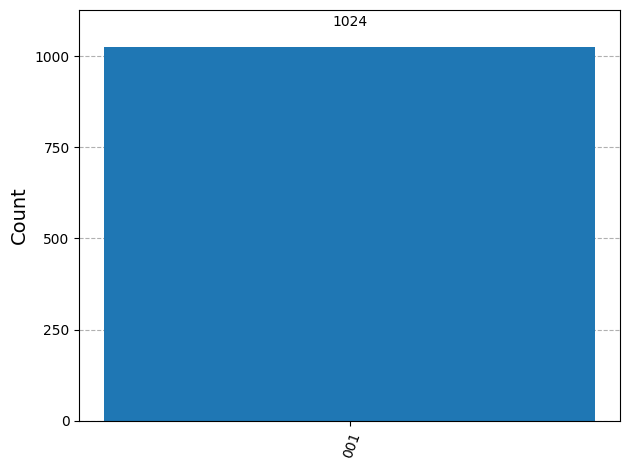

{'001': 1024}

In [5]:
# Deutsch–Jozsa Algorithm (example with n=3 input qubits)

n = 3  # number of input qubits

# Oracle: constant function f(x) = 0
def constant_oracle(n):
    qc = QuantumCircuit(n+1, name="constant_oracle")
    # does nothing (always returns 0)
    return qc

# Oracle: balanced function f(x) = x0 (depends on first input bit)
def balanced_oracle_x0(n):
    qc = QuantumCircuit(n+1, name="balanced_oracle_x0")
    qc.cx(0, n)   # CNOT from first input qubit → output qubit
    return qc

# Deutsch–Jozsa circuit builder
def deutsch_jozsa(oracle, n):
    qc = QuantumCircuit(n+1, n)
    
    # Step 1: prepare output qubit in |1>
    qc.x(n)
    qc.h(n)
    
    # Step 2: Hadamard on input qubits
    qc.h(range(n))
    
    # Step 3: apply oracle
    qc.append(oracle.to_gate(), range(n+1))
    
    # Step 4: Hadamard on input qubits again
    qc.h(range(n))
    
    # Step 5: measure input qubits
    qc.measure(range(n), range(n))
    
    print(qc.draw(output="text"))
    return run_and_plot(qc)

# Run with constant oracle
print("🔹 Constant oracle (expect all zeros):")
deutsch_jozsa(constant_oracle(n), n)

# Run with balanced oracle
print("🔹 Balanced oracle (expect NOT all zeros):")
deutsch_jozsa(balanced_oracle_x0(n), n)
